# Data Preparation/ Data pre-processing
Second part of this lab session will focus on preparing the data for machine learning with Python.

We will be using the folowwing Python libraries: numpy, pandas,matplotlib and sklearn.

Data preparation phase in ML pipline may include the following  steps:
1. Loading the dataset
2. Cleaning the data
    - dealing with mising values
3. Pre-analysis of dataset in order to understand the data and gain insights:
    - visualizing the dataset
    - calculating descriptive statistics
4. Identifying features/predictors (independent variables) and target (dependent variable) 
5. Correlation between dependent and independent variable


In [2]:
#Import the libraries and print their versions
import sys
import pandas as pd
import numpy as np
import matplotlib
import sklearn
import matplotlib.pyplot as plt

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Sklearn: {}'.format(sklearn.__version__))

Python: 3.6.7 (v3.6.7:6ec5cf24b7, Oct 20 2018, 03:02:14) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
Pandas: 0.24.2
Numpy: 1.17.0
Matplotlib: 3.1.0
Sklearn: 0.21.3


# Loading the dataset

The dataset is available through the University of California, Irvine Machine learning repository. Here is the URL:

http:////archive.ics.uci.edu/ml/datasets/Heart+Disease

This dataset contains patient data concerning heart disease diagnosis that was collected at several locations around the world. There are 76 attributes, including age, sex, resting blood pressure, cholestoral levels, echocardiogram data, exercise habits, and many others. To data, all published studies using this data focus on a subset of 14 attributes - so we will do the same. More specifically, we will use the data collected at the Cleveland Clinic Foundation.

Atttributes description:
 1. age: age in years
 2. sex: gender (1 = male; 0 = female)
 3. cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
 4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
 5. chol: serum cholestoral in mg/dl
 6. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
 7. restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
 8. thalach: maximum heart rate achieved
 9. exang: exercise induced angina (1 = yes; 0 = no)
 10. oldpeak = ST depression induced by exercise relative to rest
 11. slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
 12. ca: number of major vessels (0-3) colored by flourosopy
 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
 14. class: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        


To import the necessary data, we will use pandas' built in <code>read_csv() </code> function. 
The dataset does not have first header column in .csv file. Therefore, we will create a header for our dataframe based on data descrption provided in the URL above.


In [3]:
# import the heart disease dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
#create header with 14 attributes, the header_names will be the names of each column in our pandas DataFrame
header_names = [
        'age',
        'sex',
        'cp',
        'trestbps',
        'chol',
        'fbs',
        'restecg',
        'thalach',
        'exang',
        'oldpeak',
        'slope',
        'ca',
        'thal',
        'class']
# read the csv
cleveland = pd.read_csv(url,names=header_names)
cleveland

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
5    56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0      0.8   
6    62.0  0.0  4.0     140.0  268.0  0.0      2.0    160.0    0.0      3.6   
7    57.0  0.0  4.0     120.0  354.0  0.0      0.0    163.0    1.0      0.6   
8    63.0  1.0  4.0     130.0  254.0  0.0      2.0    147.0    0.0      1.4   
9    53.0  1.0  4.0     140.0  203.0  1.0      2.0    155.0    1.0      3.1   
10   57.0  1.0  4.0     140.0  192.0  0.0      0.0    148.0    0.0      0.4   
11   56.0  0.0  2.0     140.0  294.0  0.0      2.0    153.0    0.0      1.3   
12   56.0  1.0  3.0     130.0  256.0  1.0      2.0    142.0    1.0      0.6   
13   44.0  1.0  2.0     120.0  263.0  0.0      0.0    173.0    0.0      0.0   
14   52.0  1.0  3.0     172.0  199.0  1.0      0.0    162.0    0.0      0.5   
15   57.0  1.0  3.0     150.0  168.0  0.0      0.0    174.0    0.0      1.6   
16   48.0  1.0  2.0     110.0  229.0  0.0      0.0    168.0    0.0      1.0   
17   54.0  1.0  4.0     140.0  239.0  0.0      0.0    160.0    0.0      1.2   
18   48.0  0.0  3.0     130.0  275.0  0.0      0.0    139.0    0.0      0.2   
19   49.0  1.0  2.0     130.0  266.0  0.0      0.0    171.0    0.0      0.6   
20   64.0  1.0  1.0     110.0  211.0  0.0      2.0    144.0    1.0      1.8   
21   58.0  0.0  1.0     150.0  283.0  1.0      2.0    162.0    0.0      1.0   
22   58.0  1.0  2.0     120.0  284.0  0.0      2.0    160.0    0.0      1.8   
23   58.0  1.0  3.0     132.0  224.0  0.0      2.0    173.0    0.0      3.2   
24   60.0  1.0  4.0     130.0  206.0  0.0      2.0    132.0    1.0      2.4   
25   50.0  0.0  3.0     120.0  219.0  0.0      0.0    158.0    0.0      1.6   
26   58.0  0.0  3.0     120.0  340.0  0.0      0.0    172.0    0.0      0.0   
27   66.0  0.0  1.0     150.0  226.0  0.0      0.0    114.0    0.0      2.6   
28   43.0  1.0  4.0     150.0  247.0  0.0      0.0    171.0    0.0      1.5   
29   40.0  1.0  4.0     110.0  167.0  0.0      2.0    114.0    1.0      2.0   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
273  71.0  0.0  4.0     112.0  149.0  0.0      0.0    125.0    0.0      1.6   
274  59.0  1.0  1.0     134.0  204.0  0.0      0.0    162.0    0.0      0.8   
275  64.0  1.0  1.0     170.0  227.0  0.0      2.0    155.0    0.0      0.6   
276  66.0  0.0  3.0     146.0  278.0  0.0      2.0    152.0    0.0      0.0   
277  39.0  0.0  3.0     138.0  220.0  0.0      0.0    152.0    0.0      0.0   
278  57.0  1.0  2.0     154.0  232.0  0.0      2.0    164.0    0.0      0.0   
279  58.0  0.0  4.0     130.0  197.0  0.0      0.0    131.0    0.0      0.6   
280  57.0  1.0  4.0     110.0  335.0  0.0      0.0    143.0    1.0      3.0   
281  47.0  1.0  3.0     130.0  253.0  0.0      0.0    179.0    0.0      0.0   
282  55.0  0.0  4.0     128.0  205.0  0.0      1.0    130.0    1.0      2.0   
283  35.0  1.0  2.0     122.0  192.0  0.0      0.0    174.0    0.0      0.0   
284  61.0  1.0  4.0     148.0  203.0  0.0      0.0    161.0    0.0      0.0   
285  58.0  1.0  4.0     114.0  318.0  0.0      1.0    140.0    0.0      4.4   
286  58.0  0.0  4.0     170.0  225.0  1.0      2.0    146.0    1.0      2.8   
287  58.0  1.0  2.0     125.0  220.0  0.0      0.0    144.0    0.0      0.4   
288  56.0  1.0  2.0     130.0  221.0  0.0      2.0    163.0    0.0      0.0   
289  56.0  1.0  2.0     120.0  240.0  0.0      0.0    169.0    0.0      0.0   
290  67.0  1.0  3.0     152.0  212.0  0.0      2.0    150.0    0.0      0.8   
291  55.0  0.0  2.0     132.0  342.0  0.0      0.0    16

# 2. Cleaning the data

In [4]:
# print the last twenty or so data points
cleveland.loc[280:]

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
280  57.0  1.0  4.0     110.0  335.0  0.0      0.0    143.0    1.0      3.0   
281  47.0  1.0  3.0     130.0  253.0  0.0      0.0    179.0    0.0      0.0   
282  55.0  0.0  4.0     128.0  205.0  0.0      1.0    130.0    1.0      2.0   
283  35.0  1.0  2.0     122.0  192.0  0.0      0.0    174.0    0.0      0.0   
284  61.0  1.0  4.0     148.0  203.0  0.0      0.0    161.0    0.0      0.0   
285  58.0  1.0  4.0     114.0  318.0  0.0      1.0    140.0    0.0      4.4   
286  58.0  0.0  4.0     170.0  225.0  1.0      2.0    146.0    1.0      2.8   
287  58.0  1.0  2.0     125.0  220.0  0.0      0.0    144.0    0.0      0.4   
288  56.0  1.0  2.0     130.0  221.0  0.0      2.0    163.0    0.0      0.0   
289  56.0  1.0  2.0     120.0  240.0  0.0      0.0    169.0    0.0      0.0   
290  67.0  1.0  3.0     152.0  212.0  0.0      2.0    150.0    0.0      0.8   
291  55.0  0.0  2.0     132.0  342.0  0.0      0.0    166.0    0.0      1.2   
292  44.0  1.0  4.0     120.0  169.0  0.0      0.0    144.0    1.0      2.8   
293  63.0  1.0  4.0     140.0  187.0  0.0      2.0    144.0    1.0      4.0   
294  63.0  0.0  4.0     124.0  197.0  0.0      0.0    136.0    1.0      0.0   
295  41.0  1.0  2.0     120.0  157.0  0.0      0.0    182.0    0.0      0.0   
296  59.0  1.0  4.0     164.0  176.0  1.0      2.0     90.0    0.0      1.0   
297  57.0  0.0  4.0     140.0  241.0  0.0      0.0    123.0    1.0      0.2   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca thal  class  
280    2.0  1.0  7.0      2  
281    1.0  0.0  3.0      0  
282    2.0  1.0  7.0      3  
283    1.0  0.0  3.0      0  
284    1.0  1.0  7.0      2  
285    3.0  3.0  6.0      4  
286    2.0  2.0  6.0      2  
287    2.0    ?  7.0      0  
288    1.0  0.0  7.0      0  
289    3.0  0.0  3.0      0  
290    2.0  0.0  7.0      1  
291    1.0  0.0  3.0      0  
292    3.0  0.0  6.0      2  
293    1.0  2.0  7.0      2  
294    2.0  0.0  3.0      1  
295    1.0  0.0  3.0      0  
296    2.0  2.0  6.0      3  
297    2.0  0.0  7.0      1  
298    2.0  0.0  7.0      1  
299    2.0  2.0  7.0      2  
300    2.0  1.0  7.0      3  
301    2.0  1.0  3.0      1  
302    1.0    ?  3.0      0

In [5]:
# remove missing data (indicated with a "?")
data = cleveland[~cleveland.isin(['?'])]
data.loc[280:]

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
280  57.0  1.0  4.0     110.0  335.0  0.0      0.0    143.0    1.0      3.0   
281  47.0  1.0  3.0     130.0  253.0  0.0      0.0    179.0    0.0      0.0   
282  55.0  0.0  4.0     128.0  205.0  0.0      1.0    130.0    1.0      2.0   
283  35.0  1.0  2.0     122.0  192.0  0.0      0.0    174.0    0.0      0.0   
284  61.0  1.0  4.0     148.0  203.0  0.0      0.0    161.0    0.0      0.0   
285  58.0  1.0  4.0     114.0  318.0  0.0      1.0    140.0    0.0      4.4   
286  58.0  0.0  4.0     170.0  225.0  1.0      2.0    146.0    1.0      2.8   
287  58.0  1.0  2.0     125.0  220.0  0.0      0.0    144.0    0.0      0.4   
288  56.0  1.0  2.0     130.0  221.0  0.0      2.0    163.0    0.0      0.0   
289  56.0  1.0  2.0     120.0  240.0  0.0      0.0    169.0    0.0      0.0   
290  67.0  1.0  3.0     152.0  212.0  0.0      2.0    150.0    0.0      0.8   
291  55.0  0.0  2.0     132.0  342.0  0.0      0.0    166.0    0.0      1.2   
292  44.0  1.0  4.0     120.0  169.0  0.0      0.0    144.0    1.0      2.8   
293  63.0  1.0  4.0     140.0  187.0  0.0      2.0    144.0    1.0      4.0   
294  63.0  0.0  4.0     124.0  197.0  0.0      0.0    136.0    1.0      0.0   
295  41.0  1.0  2.0     120.0  157.0  0.0      0.0    182.0    0.0      0.0   
296  59.0  1.0  4.0     164.0  176.0  1.0      2.0     90.0    0.0      1.0   
297  57.0  0.0  4.0     140.0  241.0  0.0      0.0    123.0    1.0      0.2   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca thal  class  
280    2.0  1.0  7.0      2  
281    1.0  0.0  3.0      0  
282    2.0  1.0  7.0      3  
283    1.0  0.0  3.0      0  
284    1.0  1.0  7.0      2  
285    3.0  3.0  6.0      4  
286    2.0  2.0  6.0      2  
287    2.0  NaN  7.0      0  
288    1.0  0.0  7.0      0  
289    3.0  0.0  3.0      0  
290    2.0  0.0  7.0      1  
291    1.0  0.0  3.0      0  
292    3.0  0.0  6.0      2  
293    1.0  2.0  7.0      2  
294    2.0  0.0  3.0      1  
295    1.0  0.0  3.0      0  
296    2.0  2.0  6.0      3  
297    2.0  0.0  7.0      1  
298    2.0  0.0  7.0      1  
299    2.0  2.0  7.0      2  
300    2.0  1.0  7.0      3  
301    2.0  1.0  3.0      1  
302    1.0  NaN  3.0      0

In [6]:
# drop rows with NaN values from DataFrame
data = data.dropna(axis=0)
print(data.shape)
print(data.dtypes)

#replace Nan values with median
#median_ca = data["ca"].median()
#data["ca"].fillna(median,inplace=True)

#using SimpleImputer from sklearn library to reaplce each attribute's missing values with the median of that attribute:
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(strategy="median")
#imputer.fit(data) # computes the media for each attribute and store it in .statistics_
#imput_data = imputer.transform(data) #replace all missign values to meadian value

(297, 14)
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
class         int64
dtype: object


In [7]:
# transform data to numeric to enable further analysis
data = data.apply(pd.to_numeric)
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
class         int64
dtype: object

# 3. Pre-analysis of dataset in order to understand the data
Plot histogram for each numerical attribute in order to get a feel of the type of data we are dealing with.

It helps:
 - to see the limited values for target variable (in this example 'class').
 - to check the attribute scales (for feature scaling)
 - to check the attribute type (numerical, categorical, etc.).
 - to see the data distribution shape. Histograms with *'tail heavy'* they extend much farther to the right of the median than to the left. This make it a bit harder for some machine learning algorithms to detect patterns. 


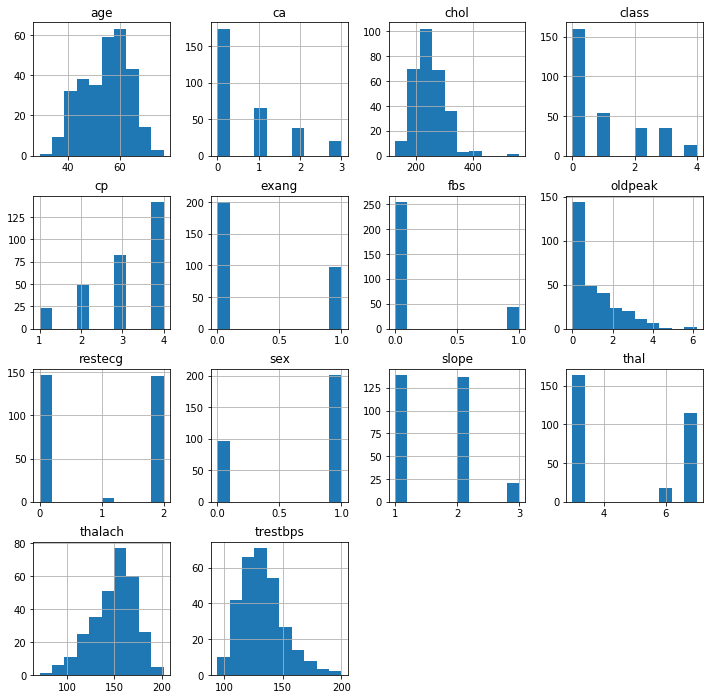

In [8]:
# plot histograms for each variable
data.hist(figsize = (12, 12))
plt.show()

In [9]:
#Destribution of classes
data["class"].value_counts()

0    160
1     54
3     35
2     35
4     13
Name: class, dtype: int64

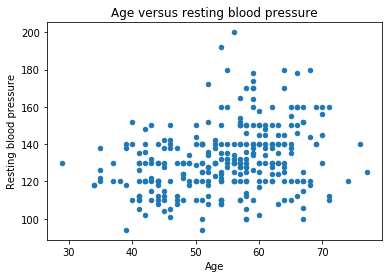

In [10]:
#Let's visualize the age and class relationship with using scatter plot 
data.plot(kind = "scatter", x = "age", y = "trestbps")
plt.title("Age versus resting blood pressure")
plt.xlabel("Age")
plt.ylabel("Resting blood pressure")

plt.show()

## Calcluate descriptive statistics

In [19]:
#print data characteristics, usings pandas built-in describe() function
data.describe()
#Note that NaN, null values are ignored automatically 

age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    3.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    1.602694    0.676768   
std      0.994914   22.941562    0.469761    1.166123    0.618187    0.938965   
min      0.000000   71.000000    0.000000    0.000000    1.000000    0.000000   
25%      0.000000  133.000000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    2.000000    0.000000   
75%      2.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    3.000000    3.000000   

             thal       class  
count  297.000000  297.000000  
mean     4.730640    0.946128  
std      1.938629    1.234551  
min      3.000000    0.000000  
25%      3.000000    0.000000  
50%      3.000000    0.000000  
75%      7.000000    2.000000  
max      7.000000    4.000000

# 4. Identifying features/predictors (independent variables) and target (dependent variable)

In this example, the features are 13 attributes and the target is class represents the diagnosis of heart disease(0 - no heart disease and 1 - patient has heart disease) 

In [11]:
X = data.loc[:, 'age':'thal'] #independent variables
y = data["class"] #traget variable 

#convert data frame to numpy arrays
X = X.to_numpy()
y = y.to_numpy()


age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
5    56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0      0.8   
6    62.0  0.0  4.0     140.0  268.0  0.0      2.0    160.0    0.0      3.6   
7    57.0  0.0  4.0     120.0  354.0  0.0      0.0    163.0    1.0      0.6   
8    63.0  1.0  4.0     130.0  254.0  0.0      2.0    147.0    0.0      1.4   
9    53.0  1.0  4.0     140.0  203.0  1.0      2.0    155.0    1.0      3.1   
10   57.0  1.0  4.0     140.0  192.0  0.0      0.0    148.0    0.0      0.4   
11   56.0  0.0  2.0     140.0  294.0  0.0      2.0    153.0    0.0      1.3   
12   56.0  1.0  3.0     130.0  256.0  1.0      2.0    142.0    1.0      0.6   
13   44.0  1.0  2.0     120.0  263.0  0.0      0.0    173.0    0.0      0.0   
14   52.0  1.0  3.0     172.0  199.0  1.0      0.0    162.0    0.0      0.5   
15   57.0  1.0  3.0     150.0  168.0  0.0      0.0    174.0    0.0      1.6   
16   48.0  1.0  2.0     110.0  229.0  0.0      0.0    168.0    0.0      1.0   
17   54.0  1.0  4.0     140.0  239.0  0.0      0.0    160.0    0.0      1.2   
18   48.0  0.0  3.0     130.0  275.0  0.0      0.0    139.0    0.0      0.2   
19   49.0  1.0  2.0     130.0  266.0  0.0      0.0    171.0    0.0      0.6   
20   64.0  1.0  1.0     110.0  211.0  0.0      2.0    144.0    1.0      1.8   
21   58.0  0.0  1.0     150.0  283.0  1.0      2.0    162.0    0.0      1.0   
22   58.0  1.0  2.0     120.0  284.0  0.0      2.0    160.0    0.0      1.8   
23   58.0  1.0  3.0     132.0  224.0  0.0      2.0    173.0    0.0      3.2   
24   60.0  1.0  4.0     130.0  206.0  0.0      2.0    132.0    1.0      2.4   
25   50.0  0.0  3.0     120.0  219.0  0.0      0.0    158.0    0.0      1.6   
26   58.0  0.0  3.0     120.0  340.0  0.0      0.0    172.0    0.0      0.0   
27   66.0  0.0  1.0     150.0  226.0  0.0      0.0    114.0    0.0      2.6   
28   43.0  1.0  4.0     150.0  247.0  0.0      0.0    171.0    0.0      1.5   
29   40.0  1.0  4.0     110.0  167.0  0.0      2.0    114.0    1.0      2.0   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
271  66.0  1.0  4.0     160.0  228.0  0.0      2.0    138.0    0.0      2.3   
272  46.0  1.0  4.0     140.0  311.0  0.0      0.0    120.0    1.0      1.8   
273  71.0  0.0  4.0     112.0  149.0  0.0      0.0    125.0    0.0      1.6   
274  59.0  1.0  1.0     134.0  204.0  0.0      0.0    162.0    0.0      0.8   
275  64.0  1.0  1.0     170.0  227.0  0.0      2.0    155.0    0.0      0.6   
276  66.0  0.0  3.0     146.0  278.0  0.0      2.0    152.0    0.0      0.0   
277  39.0  0.0  3.0     138.0  220.0  0.0      0.0    152.0    0.0      0.0   
278  57.0  1.0  2.0     154.0  232.0  0.0      2.0    164.0    0.0      0.0   
279  58.0  0.0  4.0     130.0  197.0  0.0      0.0    131.0    0.0      0.6   
280  57.0  1.0  4.0     110.0  335.0  0.0      0.0    143.0    1.0      3.0   
281  47.0  1.0  3.0     130.0  253.0  0.0      0.0    179.0    0.0      0.0   
282  55.0  0.0  4.0     128.0  205.0  0.0      1.0    130.0    1.0      2.0   
283  35.0  1.0  2.0     122.0  192.0  0.0      0.0    174.0    0.0      0.0   
284  61.0  1.0  4.0     148.0  203.0  0.0      0.0    161.0    0.0      0.0   
285  58.0  1.0  4.0     114.0  318.0  0.0      1.0    140.0    0.0      4.4   
286  58.0  0.0  4.0     170.0  225.0  1.0      2.0    146.0    1.0      2.8   
288  56.0  1.0  2.0     130.0  221.0  0.0      2.0    163.0    0.0      0.0   
289  56.0  1.0  2.0     120.0  240.0  0.0      0.0    169.0    0.0      0.0   
290  67.0  1.0  3.0     152.0  212.0  0.0      2.0    15

## 5. Correlation between dependent and independent variables

The correlation coefficient ranges from -1 to 1. Where, when it is close to 1, it means that there is a strong linear positive correlation. In our example, we have three independent variables (ca,thal,oldpeak) having biggest positive correlation ranging from 0.50-0.52. When the coefficeint is close to -1, it means that there is a strong negative correlation. In our example, we have one strong negative correlation between maximum heart rate achieved (*thalach = -0.42*) and the heart disease type. That means patients with no heart disease tend to have low/medium heart rate. Finally, coefficients close to zero mean that there is no linear correlation. 

Note: the correlation coefficient only measures linear correlations/relationships (like if x goes up, then y goes down/up. It may completely miss out on nonlinear relationships. 

Correlation helps to identify informative features/variables for linear based machine leanring algorithms. Features/variables that close to 0, may be excluded for further analysis. 

In [12]:
#Using corr() method
corr_matrix = data.corr()
corr_matrix["class"].sort_values(ascending=False)

class       1.000000
ca          0.521178
thal        0.513377
oldpeak     0.501461
cp          0.404248
exang       0.391613
slope       0.374689
sex         0.226797
age         0.222156
restecg     0.184136
trestbps    0.159620
chol        0.066448
fbs         0.049040
thalach    -0.420639
Name: class, dtype: float64

Figure below shows various plots for standard correlation coefficients from Wikipedia

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1280px-Correlation_examples2.svg.png">

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12aed7208>,
      dtype=object)

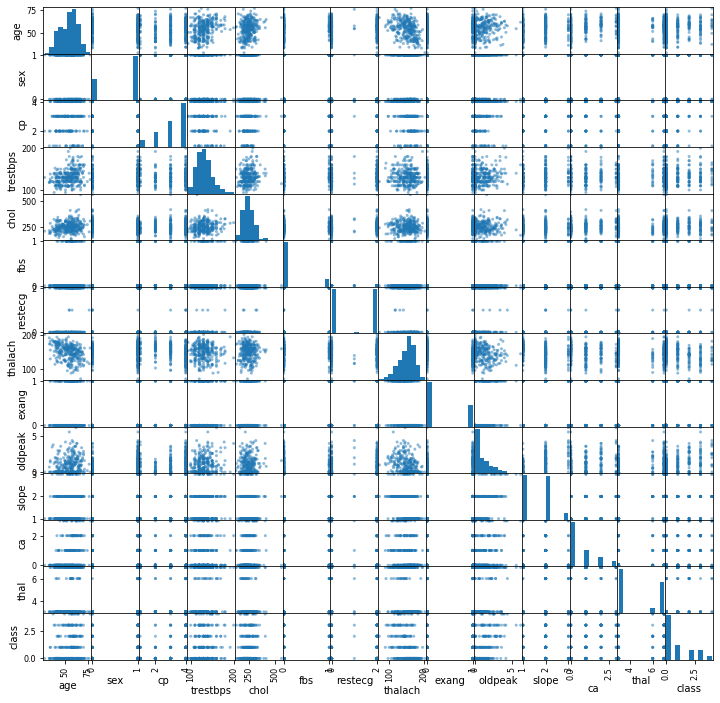

In [33]:
#Using scatter_matrix() method
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize=(12,12))

The main diagonal (top left to bottom right) shows a histogram of each attribute. 
Many attributes does not have linear correlation with class variable beacuse they are many categorical variables (such as thal,ca, slope,etc.) and class variable it self is categorical. 

# 6 Predict heart disease
Supervised learning
We will use two models to compare:
  - model 1 : Support Vector Machine (SVM)
  - model 2 : Desicion Trees


In [31]:
#import machine learning algorithms from Sklearn library
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

names = [
    'SVC (Linear)',
    'Random Forest'
]

#create classifiers : SVM and Random Forest
classifiers = [
    SVC(gamma=0.001),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
]


#data normalization
#transformer = Normalizer().fit(X)
#X_norm = transformer.transform(X)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, shuffle=False)

# Iterate over classifiers
for name,clf in zip(names,classifiers):
    #train classifier
    clf.fit(X_train,y_train)
    #make prediction of heart disease on the test subset data
    y_predicted = clf.predict(X_test)
    #print the classification report
    print(
    f"Classification report for classifier {name}:\n"
    f"{metrics.classification_report(y_test, y_predicted)}\n")



Classification report for classifier SVC (Linear):
              precision    recall  f1-score   support

           0       0.55      0.97      0.71        79
           1       0.11      0.04      0.06        27
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00         6

    accuracy                           0.52       149
   macro avg       0.13      0.20      0.15       149
weighted avg       0.31      0.52      0.38       149


Classification report for classifier Random Forest:
              precision    recall  f1-score   support

           0       0.68      0.99      0.80        79
           1       0.30      0.11      0.16        27
           2       0.50      0.35      0.41        20
           3       0.25      0.12      0.16        17
           4       0.00      0.00      0.00         6

    accuracy                           0.60       149
   macro avg       0.35    

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Understanding the Sklearn Classification Report
A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. The report shows the main classification metrics precision, recall and f1-score on a per-class basis.
More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report:
    
    - TN / True Negative: when a case was negative and predicted negative
    - TP / True Positive: when a case was positive and predicted positive
    - FN / False Negative: when a case was positive but predicted negative
    - FP / False Positive: when a case was negative but predicted positive

**Precision – What percent of your predictions were correct?**
Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.

    Precision – Accuracy of positive predictions.
    Precision = TP/(TP + FP)

**Recall** – What percent of the positive cases did you catch? 

    Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

    F1 score – What percent of positive predictions were correct? 

The **F1 score** is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

The **support** is the number of occurence of the given class in your dataset

Text ara taken from the Web-source: https://muthu.co/understanding-the-classification-report-in-sklearn/ 